# Computational Linear Algebra: PCA Homework

## Initialization:
Fill the missing values in this text box and in the following code-cell.

**Academic Year:** 2024/2025

### Team Members (Alphabetical Order):
1. Lauro, Fabio (318121);
2. Martellone, Lorenzo (317331).

In [81]:
StudentID1 = 318121
StudentID2 = 317331

## Starting Code-Cell 
### Attention: DO NOT CHANGE THE CODE INSIDE THE FOLLOWING CELL!

In [82]:
####################################################################
############## DO NOT CHANGE THE CODE IN THIS CELL #################
####################################################################

import numpy as np

var_entertainment_feat_types = ['Interests', 'Movies', 'Music']
var_personal_feat_types = ['Finance', 'Phobias']
fixed_feat_types = ['Personality', 'Health']

label_types = ['Demographic']

variables_by_type = {
    'Demographics': ['Age', 'Height', 'Weight', 'Number of siblings', 
                     'Gender', 'Hand', 'Education', 'Only child', 'Home Town Type',
                     'Home Type'],
    'Finance': ['Finances', 'Shopping centres', 'Branded clothing', 
                'Entertainment spending', 'Spending on looks', 
                'Spending on gadgets', 'Spending on healthy eating'],
    'Health': ['Smoking', 'Alcohol', 'Healthy eating'],
    'Interests': ['History', 'Psychology', 'Politics', 'Mathematics', 
                  'Physics', 'Internet', 'PC', 'Economy Management', 
                  'Biology', 'Chemistry', 'Reading', 'Geography', 
                  'Foreign languages', 'Medicine', 'Law', 'Cars', 
                  'Art exhibitions', 'Religion', 'Countryside, outdoors', 
                  'Dancing', 'Musical instruments', 'Writing', 'Passive sport', 
                  'Active sport', 'Gardening', 'Celebrities', 'Shopping', 
                  'Science and technology', 'Theatre', 'Fun with friends', 
                  'Adrenaline sports', 'Pets'],
    'Movies': ['Movies', 'Horror', 'Thriller', 'Comedy', 'Romantic', 
               'Sci-fi', 'War', 'Fantasy/Fairy tales', 'Animated', 
               'Documentary', 'Western', 'Action'],
    'Music': ['Music', 'Slow songs or fast songs', 'Dance', 'Folk', 
              'Country', 'Classical music', 'Musical', 'Pop', 'Rock', 
              'Metal or Hardrock', 'Punk', 'Hiphop, Rap', 'Reggae, Ska', 
              'Swing, Jazz', 'Rock n roll', 'Alternative', 'Latino', 
              'Techno, Trance', 'Opera'],
    'Personality': ['Daily events', 'Prioritising workload', 
                    'Writing notes', 'Workaholism', 'Thinking ahead', 
                    'Final judgement', 'Reliability', 'Keeping promises', 
                    'Loss of interest', 'Friends versus money', 'Funniness', 
                    'Fake', 'Criminal damage', 'Decision making', 'Elections', 
                    'Self-criticism', 'Judgment calls', 'Hypochondria', 
                    'Empathy', 'Eating to survive', 'Giving', 
                    'Compassion to animals', 'Borrowed stuff', 
                    'Loneliness', 'Cheating in school', 'Health', 
                    'Changing the past', 'God', 'Dreams', 'Charity', 
                    'Number of friends', 'Punctuality', 'Lying', 'Waiting', 
                    'New environment', 'Mood swings', 'Appearence and gestures', 
                    'Socializing', 'Achievements', 'Responding to a serious letter', 
                    'Children', 'Assertiveness', 'Getting angry', 
                    'Knowing the right people', 'Public speaking', 
                    'Unpopularity', 'Life struggles', 'Happiness in life', 
                    'Energy levels', 'Small - big dogs', 'Personality', 
                    'Finding lost valuables', 'Getting up', 'Interests or hobbies', 
                    "Parents' advice", 'Questionnaires or polls', 'Internet usage'],
    'Phobias': ['Flying', 'Storm', 'Darkness', 'Heights', 'Spiders', 'Snakes', 
                'Rats', 'Ageing', 'Dangerous dogs', 'Fear of public speaking']
}

labels = variables_by_type['Demographics']

try:
    random_seed = min([StudentID1, StudentID2])
except NameError:
    random_seed = StudentID1

def which_featgroups():
    np.random.seed(random_seed)
    these_entertainments = np.random.choice(var_entertainment_feat_types, 2, replace=False).tolist()
    these_personal = np.random.choice(var_personal_feat_types, 1, replace=False).tolist()
    these_types = fixed_feat_types + these_personal + these_entertainments
    print('*** THESE ARE THE SELECTED TYPE OF VARIABLES:')
    for k in these_types:
        print(f'{k}')
    print('*************************************')
    return these_types

def which_features(these_types):
    np.random.seed(random_seed)
    these_features = []
    for type in these_types:
        if type != 'Personality':
            these_features += variables_by_type[type]
        else:
            these_features += np.random.choice(variables_by_type[type], 
                                               int(2 * (len(variables_by_type[type]) / 3)), 
                                               replace=False).tolist()
    print('*** THESE ARE THE SELECTED FEATURES:')
    for ft in these_features:
        print(f'{ft}')
    print('*************************************')
    return these_features

these_types = which_featgroups()
these_features = which_features(these_types)

np.random.seed(random_seed)

*** THESE ARE THE SELECTED TYPE OF VARIABLES:
Personality
Health
Phobias
Music
Interests
*************************************
*** THESE ARE THE SELECTED FEATURES:
Charity
Giving
Assertiveness
Dreams
Getting up
Workaholism
Happiness in life
Loneliness
Finding lost valuables
Friends versus money
Questionnaires or polls
Socializing
Mood swings
Punctuality
Public speaking
Compassion to animals
Eating to survive
Criminal damage
Borrowed stuff
Elections
Children
Final judgement
Loss of interest
Cheating in school
Health
Number of friends
Responding to a serious letter
Unpopularity
Getting angry
Small - big dogs
New environment
Internet usage
Reliability
Self-criticism
Keeping promises
Hypochondria
Knowing the right people
Achievements
Smoking
Alcohol
Healthy eating
Flying
Storm
Darkness
Heights
Spiders
Snakes
Rats
Ageing
Dangerous dogs
Fear of public speaking
Music
Slow songs or fast songs
Dance
Folk
Country
Classical music
Musical
Pop
Rock
Metal or Hardrock
Punk
Hiphop, Rap
Reggae, Ska
Swi

## Importing Modules

In the following cell, import all the modules you think are necessary for doing the homework, **among the ones listed and used during the laboratories of the course**.
No extra modules are allowed for reproducibility.

In [83]:
# DO NOT IMPORT NUMPY
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.lines import Line2D
import yaml
from IPython.display import display  # to display variables in a "nice" way

try:
    from yaml import CLoader as Loader, CDumper as Dumper
except ImportError:
    from yaml import Loader, Dumper

## Exercise 1. Preparing the Dataset

In the cells below, do the following operations:
1. load the dataset "_responses_hw.csv_";
2. create a working dataframe extracting from _responses_hw.csv_ the columns corresponding to the variables in _these_features_, and randomly selecting 2/3 of the rows. Let us call this dataframe _X_df_;
3. analyze the obtained dataframe and performing cleansing/encoding operations.

In [117]:
#just loading the dataset

url = "https://raw.githubusercontent.com/fabiolauro/PCA_CLA_Project/refs/heads/main/responses_hw.csv"

responses_df = pd.read_csv(url)
rows = responses_df.shape[0]
responses_df_rows = responses_df.sample(round(2*rows/3), replace = False, random_state= random_seed)
responses_df_rows = responses_df_rows.sort_index()

#now let's take only the columns we are interested in

X_df_raw = responses_df_rows[these_features]

display(X_df_raw)

,Charity,Giving,Assertiveness,Dreams,Getting up,Workaholism,Happiness in life,Loneliness,Finding lost valuables,Friends versus money,...,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets
0,2.0,4.0,1.0,4,2.0,4.0,4.0,3.0,3.0,3.0,...,1.0,5.0,5.0,1.0,4.0,4.0,2.0,5.0,4.0,4.0
1,1.0,2.0,2.0,3,5.0,5.0,4.0,2.0,4.0,4.0,...,1.0,1.0,1.0,2.0,3.0,3.0,2.0,4.0,2.0,5.0
2,3.0,5.0,3.0,1,4.0,3.0,4.0,5.0,3.0,5.0,...,5.0,2.0,1.0,1.0,4.0,2.0,5.0,5.0,5.0,5.0
3,3.0,1.0,5.0,3,1.0,5.0,2.0,5.0,1.0,2.0,...,1.0,1.0,1.0,2.0,4.0,3.0,1.0,2.0,1.0,1.0
4,3.0,3.0,4.0,3,4.0,3.0,3.0,3.0,2.0,3.0,...,3.0,1.0,4.0,3.0,3.0,3.0,2.0,4.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,2.0,3.0,2.0,3,5.0,4.0,4.0,4.0,4.0,4.0,...,4.0,4.0,2.0,4.0,5.0,3.0,5.0,5.0,4.0,4.0
1006,3.0,4.0,4.0,3,1.0,5.0,4.0,1.0,3.0,2.0,...,1.0,5.0,5.0,1.0,2.0,5.0,1.0,5.0,1.0,5.0
1007,1.0,1.0,1.0,3,5.0,1.0,3.0,4.0,3.0,4.0,...,2.0,2.0,1.0,1.0,2.0,3.0,2.0,3.0,1.0,5.0
1008,3.0,3.0,5.0,3,5.0,1.0,3.0,3.0,1.0,3.0,...,2.0,4.0,1.0,3.0,5.0,5.0,5.0,5.0,1.0,4.0


## DON'T RUN THE CELL BELOW!

In [40]:
#looking for missing values, cleaning operations

missing_values = X_df_raw.isnull().sum()
missing_values = missing_values.sort_values(ascending=False)

#if we drop all the missing values, we lose about 1/3 of the rows
#we could only drop values for columns with more than a given threshold of missing values, for example 5

missing_values = missing_values[missing_values > 3]

print(missing_values)


Passive sport                     10
Smoking                            7
Classical music                    7
Punk                               7
Compassion to animals              6
Friends versus money               6
Art exhibitions                    6
Swing, Jazz                        6
Chemistry                          6
Rock                               5
Gardening                          5
Countryside, outdoors              5
Geography                          5
Biology                            5
Rock n roll                        5
Alternative                        5
Responding to a serious letter     4
Folk                               4
Hiphop, Rap                        4
Dance                              4
Country                            4
Foreign languages                  4
Alcohol                            4
Theatre                            4
Writing                            4
Techno, Trance                     4
Small - big dogs                   4
F

## LEGGERE COSA C'E' SCRITTO SOTTO!

In [41]:

how_many = np.sum(missing_values)
print(how_many)
#it shows that the missing values corresponding to variables with more than 3 missing values are 162, out of 281.
#We could consider to fill those values, which won't affect sensibly the variance in the data since we are filling just a few values per variable.
#We can talk about it with the professor. For now we see the results obtained by dropping all the missing values and
#eventually just fix this part of the code

160


We choose for the moment to just get rid of the rows with missing values

In [155]:
#removing missing values

X_df_raw = X_df_raw.dropna()

display(X_df_raw)

,Charity,Giving,Assertiveness,Dreams,Getting up,Workaholism,Happiness in life,Loneliness,Finding lost valuables,Friends versus money,...,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets
0,2.0,4.0,1.0,4,2.0,4.0,4.0,3.0,3.0,3.0,...,1.0,5.0,5.0,1.0,4.0,4.0,2.0,5.0,4.0,4.0
1,1.0,2.0,2.0,3,5.0,5.0,4.0,2.0,4.0,4.0,...,1.0,1.0,1.0,2.0,3.0,3.0,2.0,4.0,2.0,5.0
2,3.0,5.0,3.0,1,4.0,3.0,4.0,5.0,3.0,5.0,...,5.0,2.0,1.0,1.0,4.0,2.0,5.0,5.0,5.0,5.0
3,3.0,1.0,5.0,3,1.0,5.0,2.0,5.0,1.0,2.0,...,1.0,1.0,1.0,2.0,4.0,3.0,1.0,2.0,1.0,1.0
4,3.0,3.0,4.0,3,4.0,3.0,3.0,3.0,2.0,3.0,...,3.0,1.0,4.0,3.0,3.0,3.0,2.0,4.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,2.0,3.0,3.0,4,5.0,1.0,3.0,3.0,2.0,5.0,...,5.0,2.0,2.0,1.0,2.0,2.0,2.0,5.0,4.0,4.0
1005,2.0,3.0,2.0,3,5.0,4.0,4.0,4.0,4.0,4.0,...,4.0,4.0,2.0,4.0,5.0,3.0,5.0,5.0,4.0,4.0
1007,1.0,1.0,1.0,3,5.0,1.0,3.0,4.0,3.0,4.0,...,2.0,2.0,1.0,1.0,2.0,3.0,2.0,3.0,1.0,5.0
1008,3.0,3.0,5.0,3,5.0,1.0,3.0,3.0,1.0,3.0,...,2.0,4.0,1.0,3.0,5.0,5.0,5.0,5.0,1.0,4.0


In [119]:
#we have to transform the categorical variables into numerical

cat_variables = X_df_raw.select_dtypes(include=['object', 'category']).columns
print(cat_variables)

Index(['Punctuality', 'Internet usage', 'Smoking', 'Alcohol'], dtype='object')


In [157]:
#we use dictionaries to map categorical variables into numerical values

smoking = {
    "never smoked": 1,
    "tried smoking": 2,
    "former smoker": 3,
    "current smoker":4
}

drinking = {
    "never": 1,
    "social drinker": 2,
    "drink a lot": 3
}

punctuality = {
    'early': 1,
    "on time": 2,
    "late": 3
}

internet = {
    'no time at all': 1,
    'less than an hour a day': 2,
    'few hours a day': 3,
    'most of the day': 4
}

X_df = X_df_raw.copy()

X_df['Internet usage'] = X_df['Internet usage'].map(internet)
X_df['Punctuality'] = X_df['Punctuality'].map(punctuality)
X_df['Smoking'] = X_df['Smoking'].map(smoking)
X_df['Alcohol'] = X_df['Alcohol'].map(drinking)

print(X_df_raw["Alcohol"], X_df["Alcohol"])
#IT WORKS!


0          drink a lot
1          drink a lot
2          drink a lot
3          drink a lot
4       social drinker
             ...      
1004    social drinker
1005       drink a lot
1007    social drinker
1008    social drinker
1009    social drinker
Name: Alcohol, Length: 495, dtype: object 0       3
1       3
2       3
3       3
4       2
       ..
1004    2
1005    3
1007    2
1008    2
1009    2
Name: Alcohol, Length: 495, dtype: int64


In [159]:
#now that we have cleaned the dataset, let's save a filtered version of the original one
#which contains also the demographic variables, that will be useful later

ind_filt = X_df.index
resp_filt = responses_df_rows.loc[ind_filt,:]
display(resp_filt)


,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Hand,Education,Only child,Home Town Type,Home Type
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right,secondary school,no,village,house/bungalow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,5.0,3.0,4.0,1.0,2.0,3.0,2.0,3.0,3.0,4.0,...,22.0,175.0,60.0,1.0,male,right,secondary school,no,city,block of flats
1005,5.0,2.0,5.0,2.0,2.0,5.0,4.0,4.0,4.0,3.0,...,20.0,164.0,57.0,1.0,female,right,secondary school,no,city,house/bungalow
1007,4.0,3.0,1.0,1.0,2.0,2.0,2.0,3.0,4.0,1.0,...,18.0,173.0,75.0,0.0,female,right,secondary school,yes,city,block of flats
1008,5.0,3.0,3.0,3.0,1.0,3.0,1.0,3.0,4.0,1.0,...,25.0,173.0,58.0,1.0,female,right,college/bachelor degree,no,city,block of flats


## Exercise 2. Analyzing the Variance and the PCs

In the cells below, do the following operations:
1. create two new dataframes from _X_df_ applying a StandardScaler and a MinMaxscaler. Call these new dataframes as _Xstd_df_ and _Xmm_df_, respectively;
2. compute the variance of all the features in _X_df_, _Xstd_df_, and _Xmm_df_ and **comment the results**;
3. compute all the $n$ Principal Components (PCs) for each dataset _X_df_, _Xstd_df_, and _Xmm_df_. Then, visualize the curves of the cumulative explained variances and **comment the results**.

### Section 2.1: Scaling the dataframes

In [125]:
#transforming the datasets

std = StandardScaler()
minmax = MinMaxScaler()

std.fit(X_df)
minmax.fit(X_df)

Xstd = std.transform(X_df)
Xstd_df = pd.DataFrame(Xstd, columns= X_df.columns)

Xmm = minmax.transform(X_df)
Xmm_df = pd.DataFrame(Xmm, columns = X_df.columns)

In [123]:
print(Xstd_df)


      Charity    Giving  Assertiveness    Dreams  Getting up  Workaholism  \
0   -0.026763  0.827738      -2.198363  1.085542   -1.285980     0.809375   
1   -1.045821 -0.656792      -1.307135 -0.432377    1.060065     1.591877   
2    0.992295  1.570003      -0.415906 -3.468216    0.278050     0.026874   
3    0.992295 -1.399057       1.366550 -0.432377   -2.067995     1.591877   
4    0.992295  0.085473       0.475322 -0.432377    0.278050     0.026874   
..        ...       ...            ...       ...         ...          ...   
490 -0.026763  0.085473      -0.415906  1.085542    1.060065    -1.538129   
491 -0.026763  0.085473      -1.307135 -0.432377    1.060065     0.809375   
492 -1.045821 -1.399057      -2.198363 -0.432377    1.060065    -1.538129   
493  0.992295  0.085473       1.366550 -0.432377    1.060065    -1.538129   
494 -1.045821 -1.399057      -1.307135 -0.432377   -1.285980     1.591877   

     Happiness in life  Loneliness  Finding lost valuables  \
0            

### Section 2.2: Computing the variance of the three dataframes

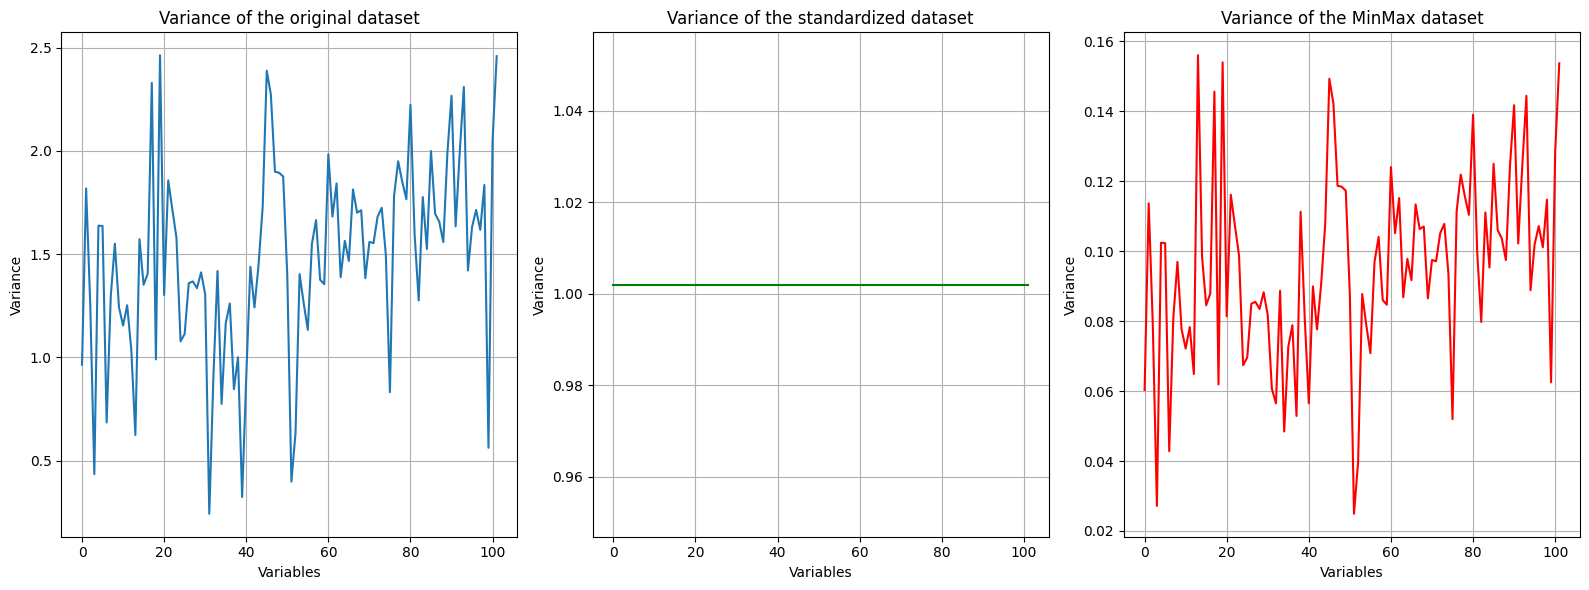

In [124]:
#computing the variance
var_x = X_df.var()
var_std = Xstd_df.var()
var_mm = Xmm_df.var()


#plotting the variance of all the datasets
fig_var, ax_var = plt.subplots(1,3, figsize=(16,6))

ax_var[0].plot(var_x.values)
ax_var[0].set_xlabel("Variables")
ax_var[0].set_ylabel("Variance")
ax_var[0].set_title("Variance of the original dataset")
ax_var[0].grid(True)

ax_var[1].plot(var_std.values, color = "green")
ax_var[1].set_xlabel("Variables")
ax_var[1].set_ylabel("Variance")
ax_var[1].set_title("Variance of the standardized dataset")
ax_var[1].grid(True)

ax_var[2].plot(var_mm.values, color = "red")
ax_var[2].set_xlabel("Variables")
ax_var[2].set_ylabel("Variance")
ax_var[2].set_title("Variance of the MinMax dataset")
ax_var[2].grid(True)

plt.tight_layout()
plt.show()


The original dataset presents a noticing variability in the variance values, where we go from a maximum of 2.5 to a minimum of 0.2 approximately. This range is not enormous but still significant.
The variance of the standardized dataset is equal to 1 for each variable, as expected due to the Standard Scaler functioning that subtracts the mean and divides by the standard deviation each value.
The MinMax dataset presents a similar behavior to the original one, in that the variables maintain their relative differences of the variance, although the range is much smaller in this case due to the rescaling: since each value is rescaled to fit into the interval of minimum and maximum for each variable, its absolute value is decreased, and this consequently reduces the absolute value of the variance.

### Section 2.3: Computing the full PCA
In this section we perform PCA without constraints on the number of components. We then compute the explained cumulative variance with respect to the PCs, and comment the results.

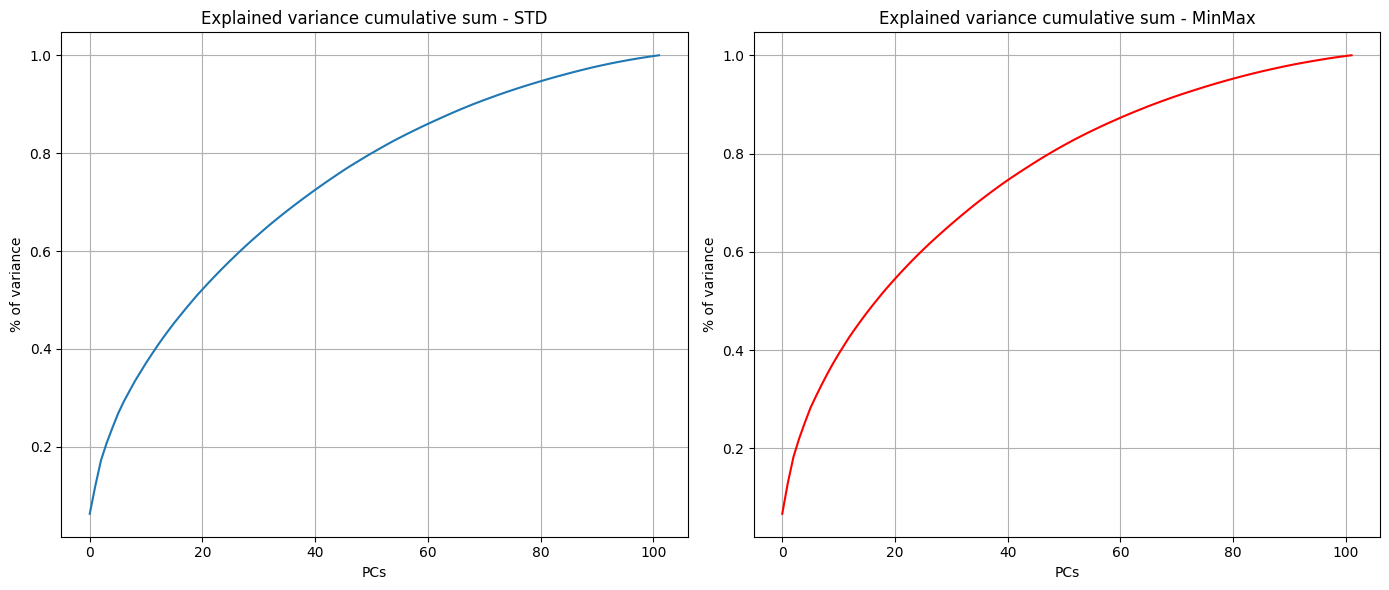

In [126]:
pca_std = PCA()
pca_mm = PCA()

pca_std.fit(Xstd_df)
pca_mm.fit(Xmm_df)

fig_full, ax_full = plt.subplots(1,2, figsize = (14,6))
ax_full[0].plot(np.cumsum(pca_std.explained_variance_ratio_))
ax_full[0].set_xlabel("PCs")
ax_full[0].set_ylabel("% of variance")
ax_full[0].set_title("Explained variance cumulative sum - STD")
ax_full[0].grid(True)

ax_full[1].plot(np.cumsum(pca_mm.explained_variance_ratio_), color = "red")
ax_full[1].set_xlabel("PCs")
ax_full[1].set_ylabel("% of variance")
ax_full[1].set_title("Explained variance cumulative sum - MinMax")
ax_full[1].grid(True)

plt.tight_layout()
plt.show()

We see an almost identical behavior in the two PCAs. We need about 20 PCs to reach 50% of the variance, which means that not only the problem is high-dimensional, but the variance is sensibly spread across the variables.

## Exercise 3. Dimensionality Reduction and PC Interpretation

In the cells below, do the following operations:
1. For each one of the two dataframes _Xstd_df_, and _Xmm_df_, compute a new PCA for performing a dimensionality reduction with respect to $m$ dimensions. The value of $m$ must be $$m = \min\{m', 5\}\,,$$ where $m'$ is the value required for obtaining $33\%$ of the total variance.
2. For both the cases, visualize all the PCs and give a name/interpretation to them. **Comment and motivate your interpretations**. If possible, **compare the differences among the results obtained** for _Xstd_df_ and _Xmm_df_.
3. Perform the score graph for both the cases (_std_ and _mm_). If $m>3$, plot the score graph with respect to the first 3 PCs. All the **plots must show the names of the PCs on the axes** for better understanding the results.
4. **Optional:** plot more score graphs, coloring the dots with respect to any label in the list _labels_ that you believe can be interesting. **Comment and analyze this optional plots**.

In [127]:
#we define a function to compute the PCA
m = 5

def pca_computation(df,max):

    print(f"Computing the PCA for the dataframe -- the maximum number of components is {max}")

    for i in range(1,max+1):
        pca = PCA(n_components=i)
        pca.fit(df)
        exp_var = np.sum(pca.explained_variance_ratio_)

        if exp_var >= 0.33:
            print(f"PCA has n={i} components!")
            print(f"Variance explained: {np.sum(pca.explained_variance_ratio_)*100:.2f}%")
            fig, ax = plt.subplots(1,2,figsize=(14,6))
            ax[0].bar(range(pca.n_components_), pca.explained_variance_ratio_ ,color = "skyblue", edgecolor = "black")
            ax[0].set_xticks(range(pca.n_components_), [f"PC{k}" for k in range(1,pca.n_components_+1)])
            ax[0].set_xlabel("Principal Components")
            ax[0].set_ylabel("Variance percentage per PC")
            ax[0].grid(True)

            ax[1].bar(range(pca.n_components_), np.cumsum(pca.explained_variance_ratio_), color = "red", edgecolor = "black")
            ax[1].set_xticks(range(pca.n_components_), [f"PC{k}" for k in range(1,pca.n_components_+1)])
            ax[1].set_xlabel("Principal Components")
            ax[1].set_ylabel("Cumulative variance")
            ax[1].grid(True)

            plt.tight_layout()
            plt.show()
            return pca
    print("Couldn't find a PCA explaining at least 33% of the variance. 5 components are given")
    print(f"Variance explained: {np.sum(pca.explained_variance_ratio_)*100:.2f}%")

    fig, ax = plt.subplots(1,2,figsize=(14,6))

    ax[0].bar(range(pca.n_components_), pca.explained_variance_ratio_ ,color = "skyblue", edgecolor = "black")
    ax[0].set_xticks(range(pca.n_components_), [f"PC{k}" for k in range(1,pca.n_components_+1)])
    ax[0].set_xlabel("Principal Components")
    ax[0].set_ylabel("Variance percentage per PC")
    ax[0].grid(True)

    ax[1].bar(range(pca.n_components_), np.cumsum(pca.explained_variance_ratio_), color = "red", edgecolor = "black")
    ax[1].set_xticks(range(pca.n_components_), [f"PC{k}" for k in range(1,pca.n_components_+1)])
    ax[1].set_xlabel("Principal Components")
    ax[1].set_ylabel("Cumulative variance")
    ax[1].grid(True)

    plt.tight_layout()
    plt.show()
    return pca



Ora utilizziamo la funzione per calcolare la PCA con un numero "m" di componenti.
Applichiamo la funzione prima al dataframe a cui è stato applicato lo StandardScaler, e poi a quello a cui è stato applicato lo MinMaxScaler.

Computing the PCA for the dataframe -- the maximum number of components is 5
Couldn't find a PCA explaining at least 33% of the variance. 5 components are given
Variance explained: 23.80%


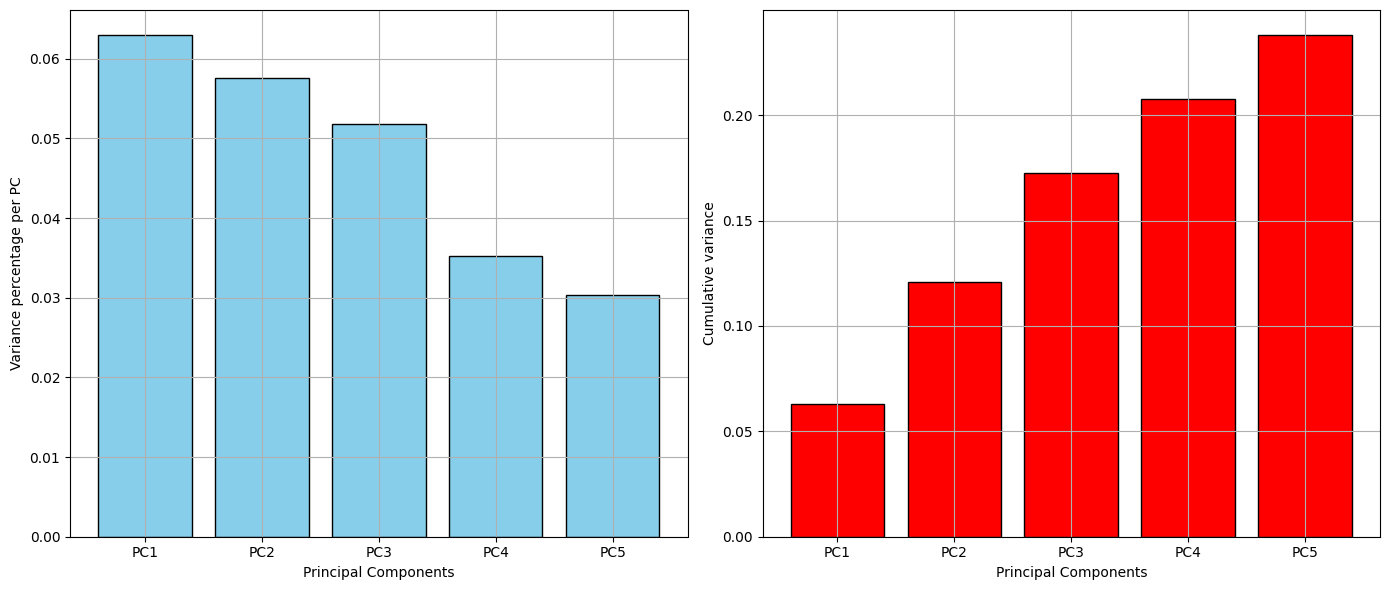

Computing the PCA for the dataframe -- the maximum number of components is 5
Couldn't find a PCA explaining at least 33% of the variance. 5 components are given
Variance explained: 25.20%


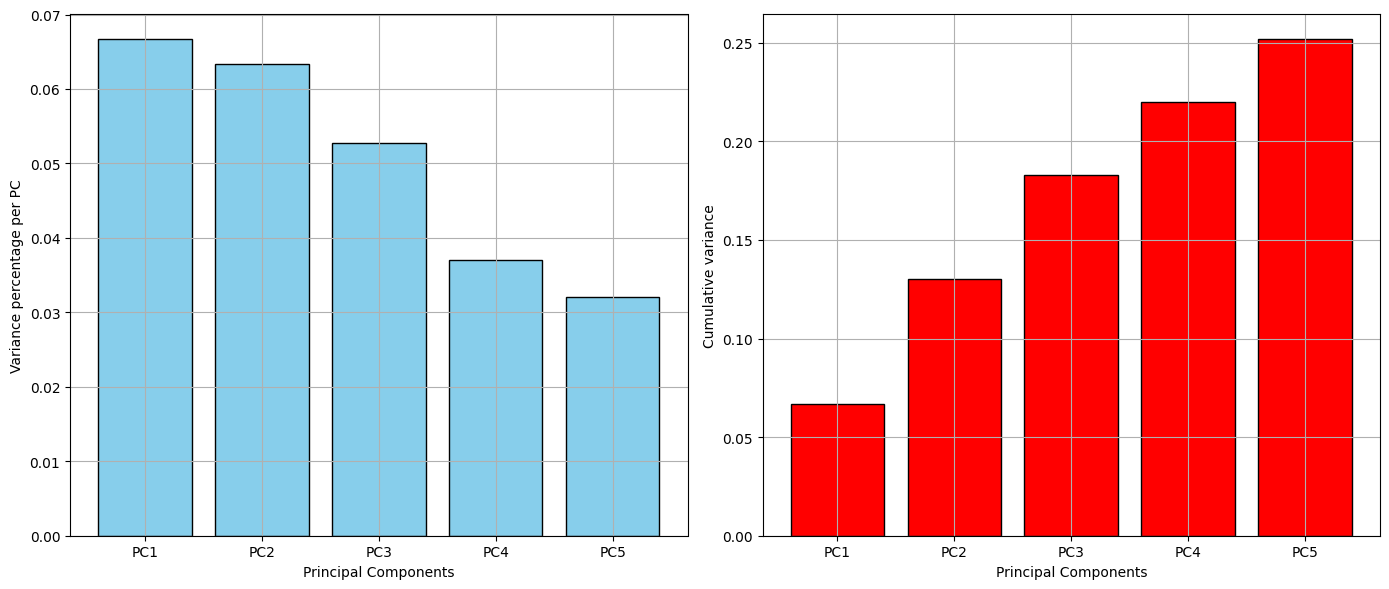

In [128]:
pca_std_m = pca_computation(Xstd_df,m) #computation of the PCA for Xstd_df

pca_minmax_m = pca_computation(Xmm_df,m) #computation of the PCA for the Xmm_df

In nessuno dei due casi si è trovato un numero di componenti minore di 5 che spiegasse almeno il 33% della varianza, il che è ragionevole dato l'elevato numero di variabili. Con entrambi i dataset riusciamo comunque a coprire circa un quarto della varianza totale.

Procediamo ora a individuare le componenti principali.
Dato che abbiamo approssimativamente 100 features, individueremo per ogni componente principale le prime 10 più importanti.

In [ ]:
#IN QUESTA CELLA AVEVO DEFINITO LA THRESHOLD UTILIZZATA NELL'ESERCITAZIONE, PERO' DA COME RISULTATO 30 VARIABILI...
#let's define a threshold to identify the features relevant to each principal component
eps = np.sqrt(1/X_df.shape[1])


In [129]:
#Here we assign a color to each feature based on its type
set3 = cm.Set3.colors

color_by_type = {
    'Health' : set3[0],
    'Interests' : set3[1],
    'Music' : set3[2],
    'Personality' : set3[3],
    'Phobias' : set3[4]
}

variable_to_color = {}

for var_type, variables in variables_by_type.items():
    if var_type in color_by_type:
        color = color_by_type[var_type]
        for variable in variables:
            variable_to_color[variable] = color


#we also define a legend for the plots

type_colors_legend = [Line2D([0], [0], color=color_by_type[k], label = k) for k in color_by_type]


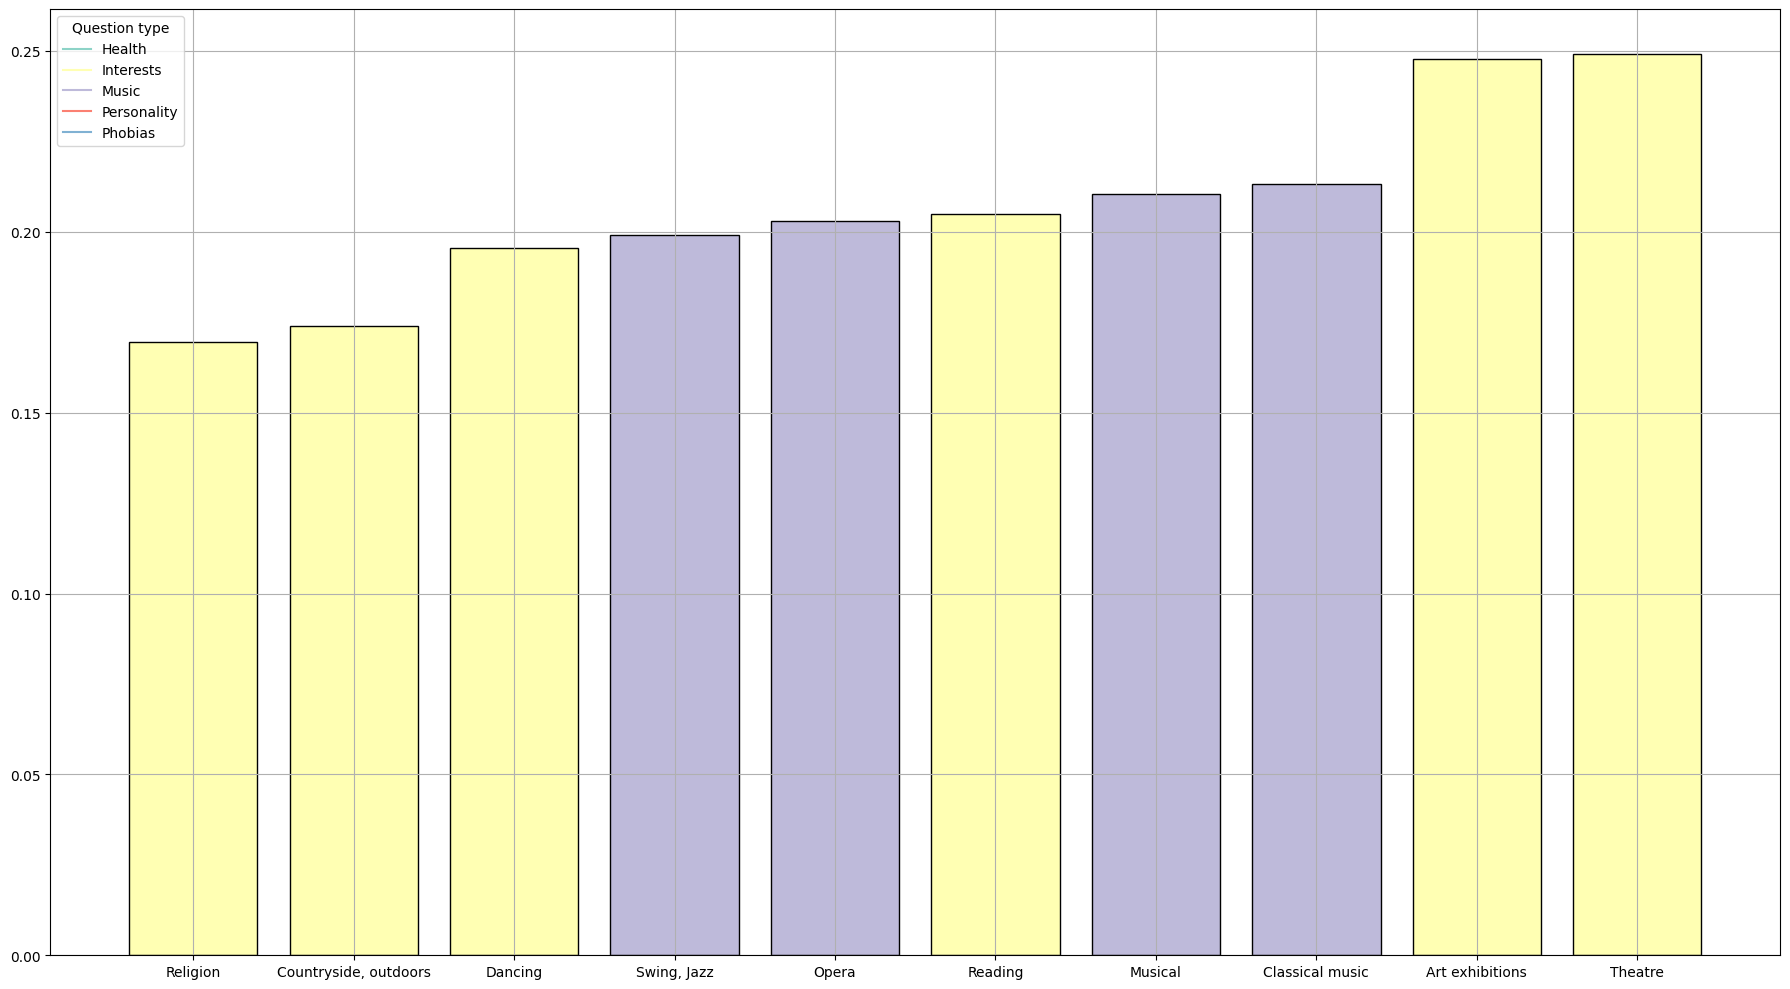

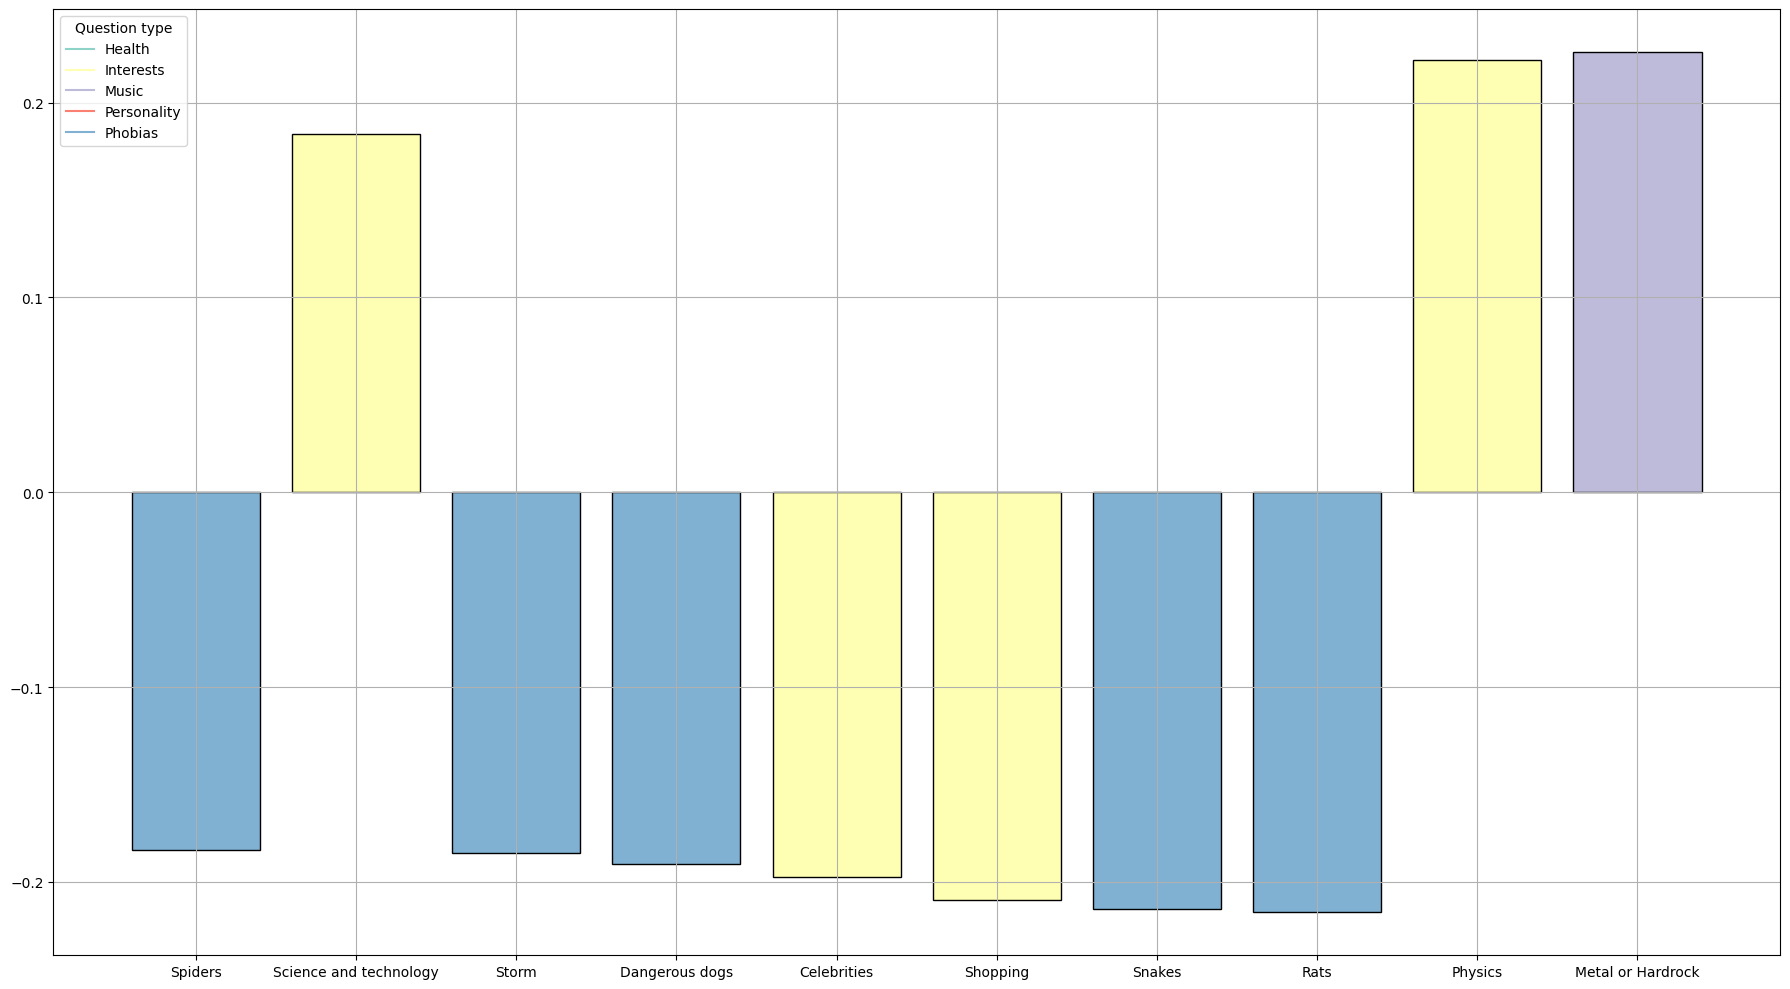

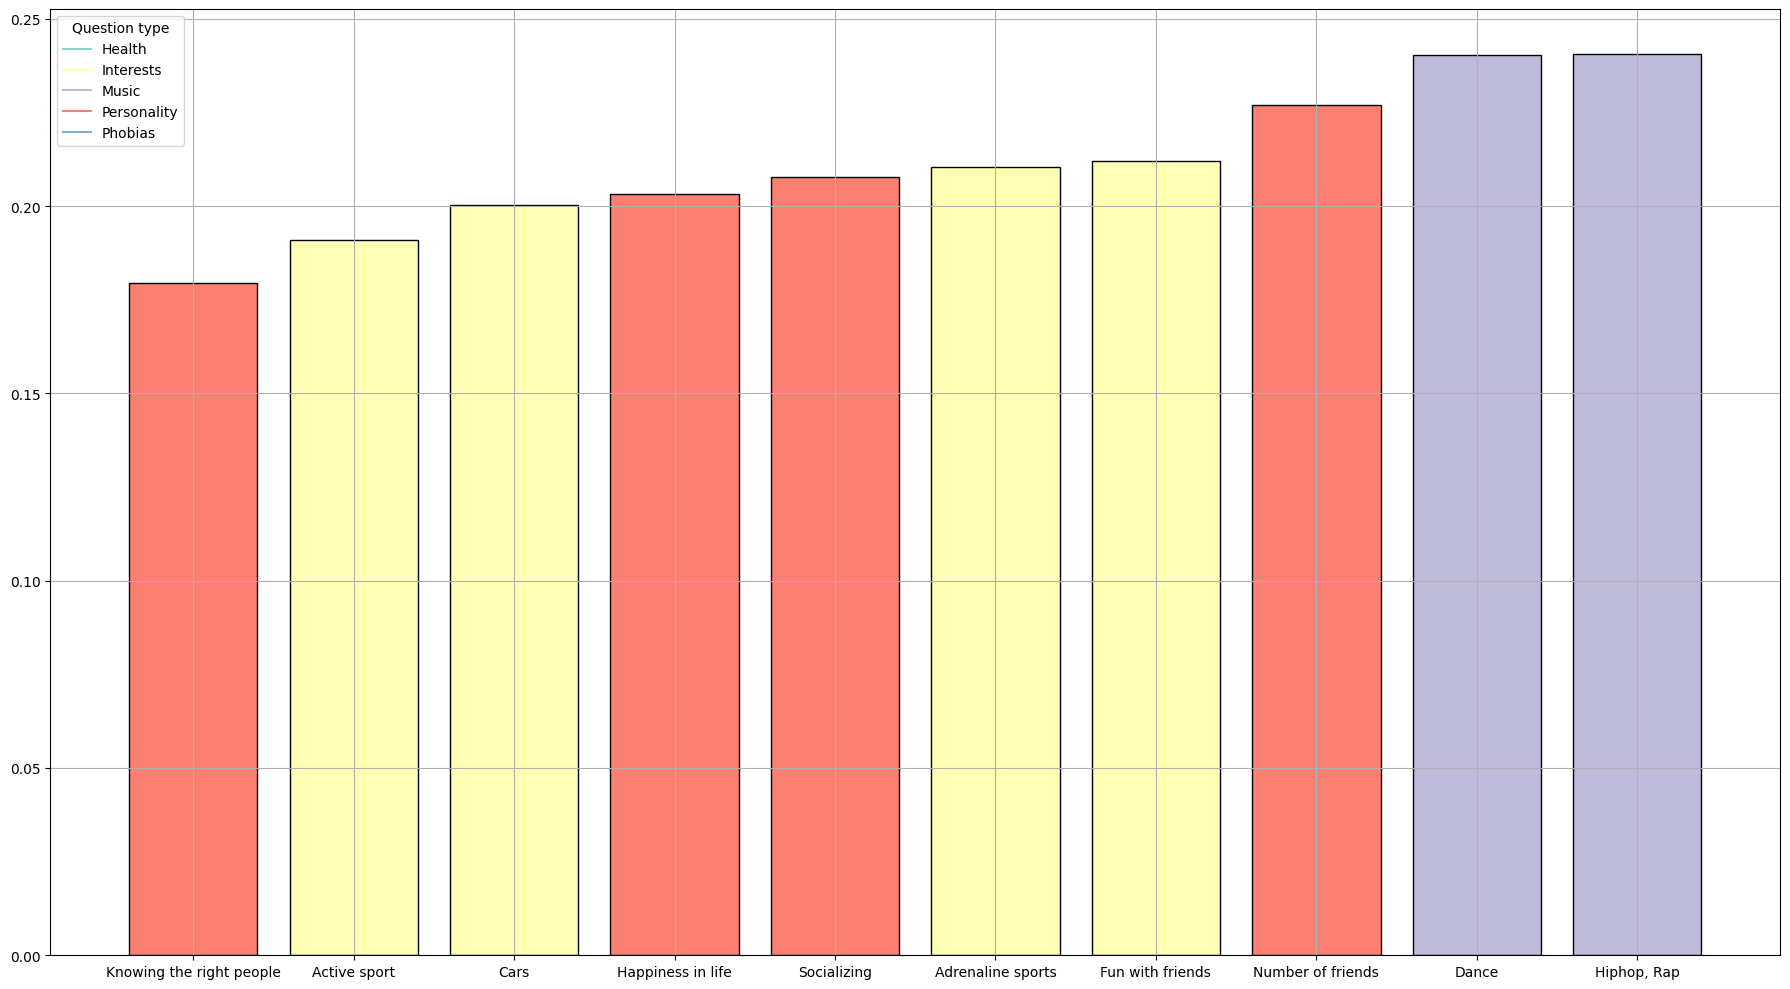

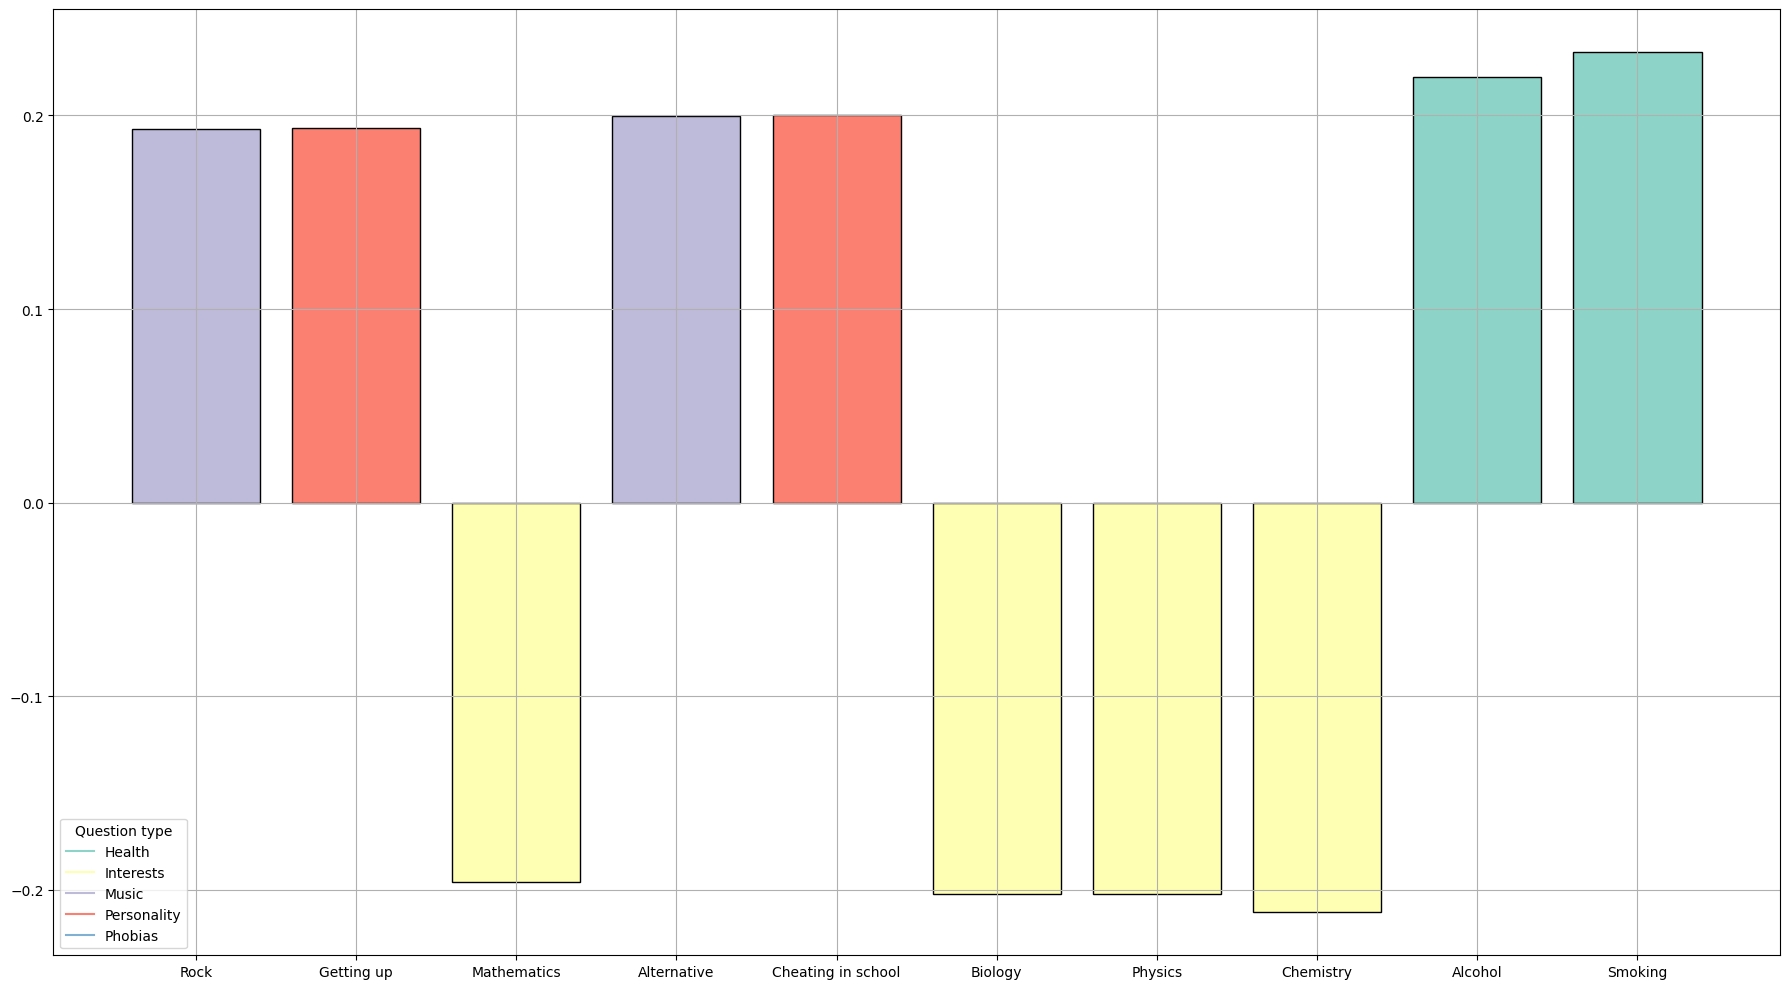

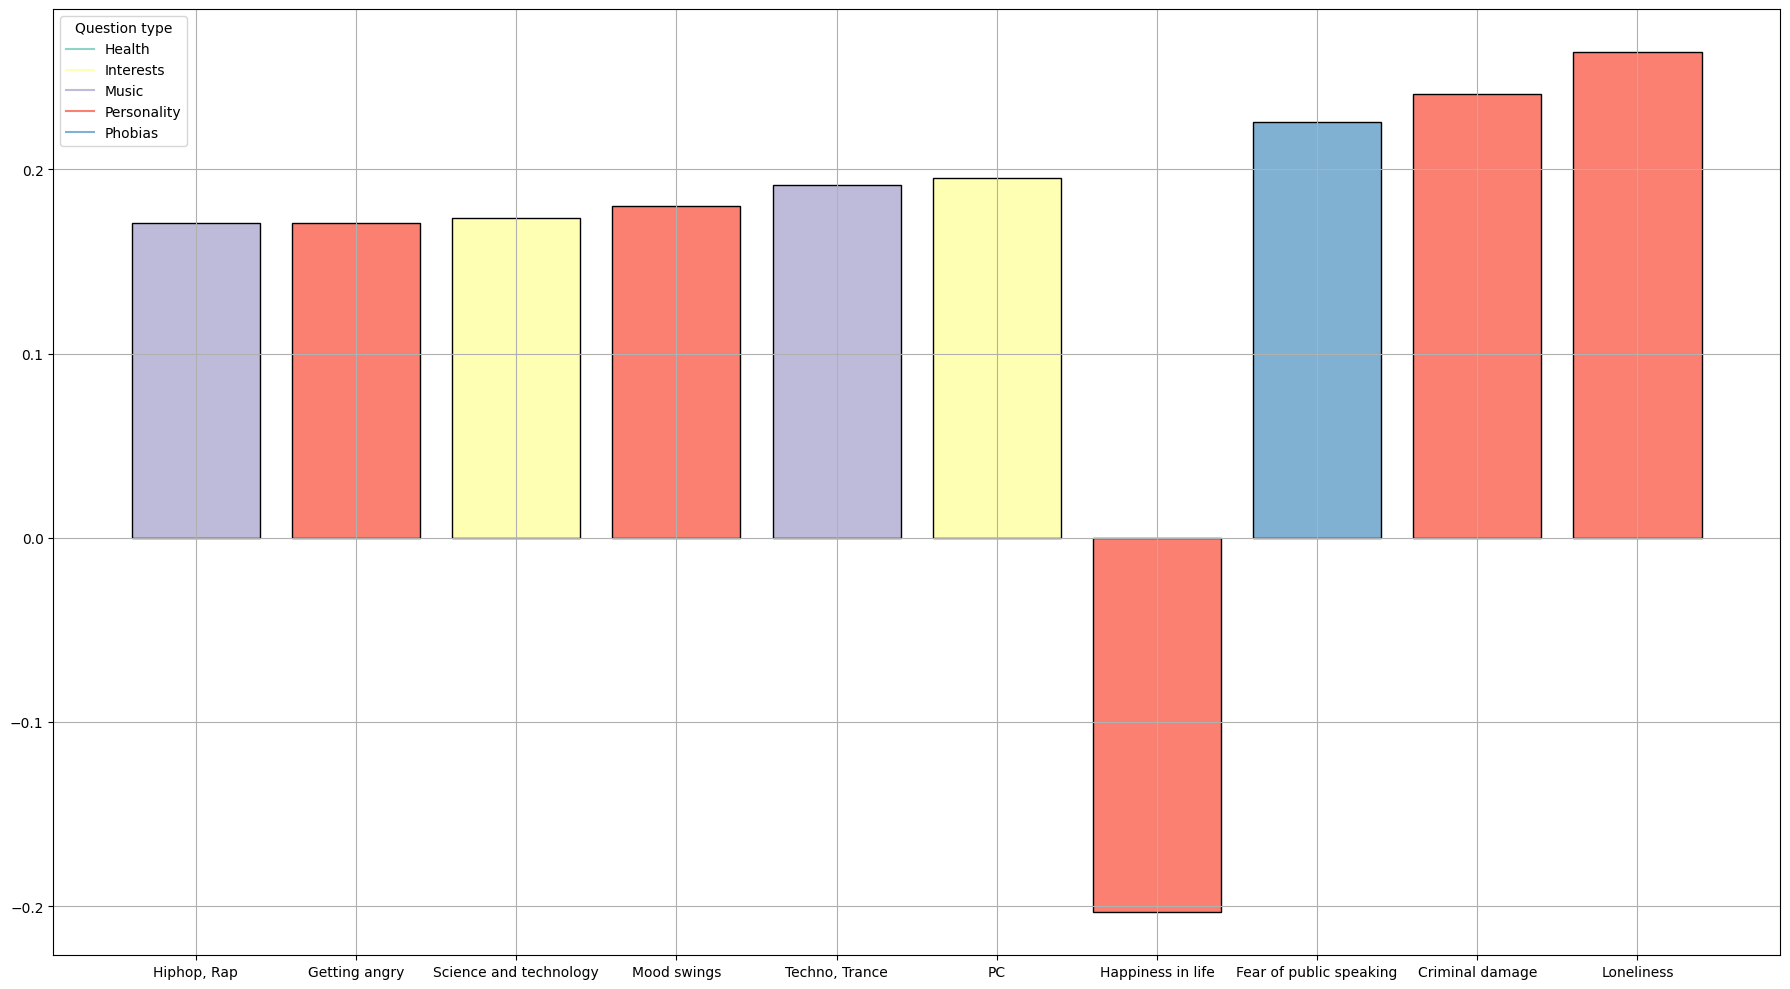

In [130]:
n_components_std = pca_std_m.n_components_ #number of components

#we define a few lists that will be useful to store all the relevant quantities

loadings_std = [] #loadings of the components
indexes_std = [] #indexes of the most important features for each component
top_10_loadings_std = [] #top 10 loadings
top_10_features_std = [] #corresponding names of the top 10 features


#in this cycle we find the most important features for each component, then we plot them

for ii in range(n_components_std):

    loadings = pca_std_m.components_[ii,:]
    indexes = np.argsort(np.abs(loadings))[-10:]
    top_10_loadings = loadings[indexes]
    top_10_features = X_df.columns[indexes]
    top_10_colors = [variable_to_color[var] for var in top_10_features]

    plt.figure(figsize=(18,10))
    plt.bar(range(10), top_10_loadings, color = top_10_colors, edgecolor = "black")
    plt.xticks(range(10), labels= top_10_features)
    plt.legend(handles = type_colors_legend, title = "Question type")
    plt.grid()
    plt.tight_layout()
    plt.show()

    loadings_std.append(loadings)
    indexes_std.append(indexes)
    top_10_loadings_std.append(top_10_loadings)
    top_10_features_std.append(top_10_features)




HERE WE TALK ABOUT THE INTERPRETATION OF EACH PC.
WE THEN GIVE THEM NAMES ACCORDINGLY.

In [131]:
#We can define the PCA features as follows:

pc_std_names = ["Arts", "Science vs phobias", "Social life and sports", "Bad habits vs science", "Bad moods vs happiness"]

Now we work on the other dataset

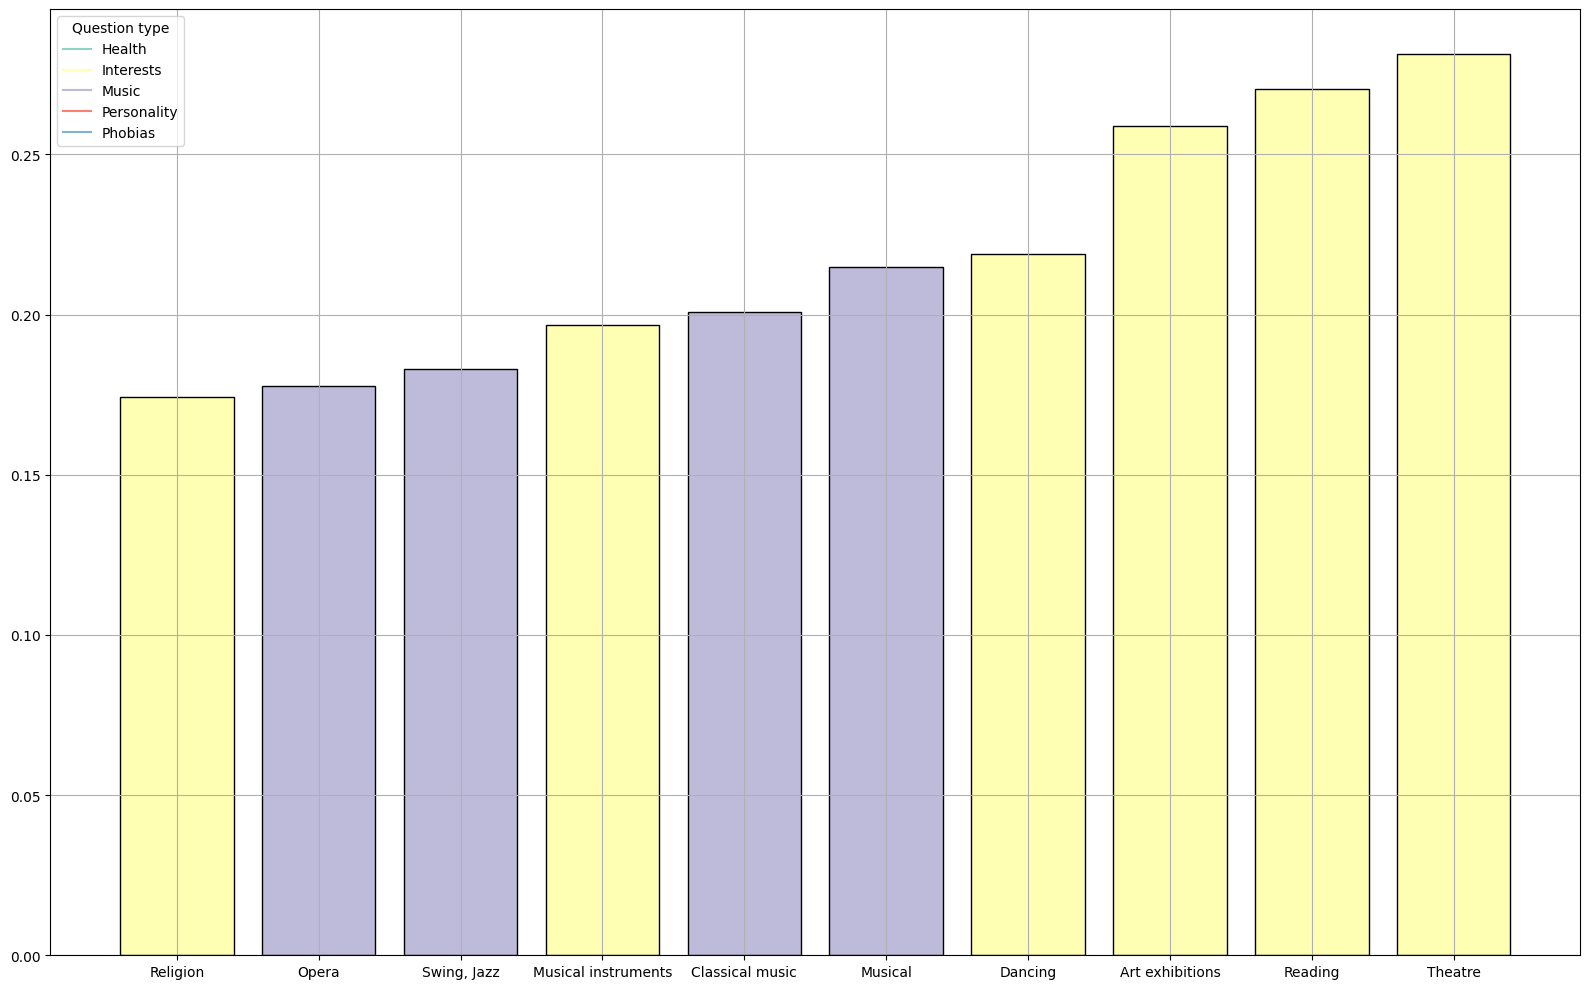

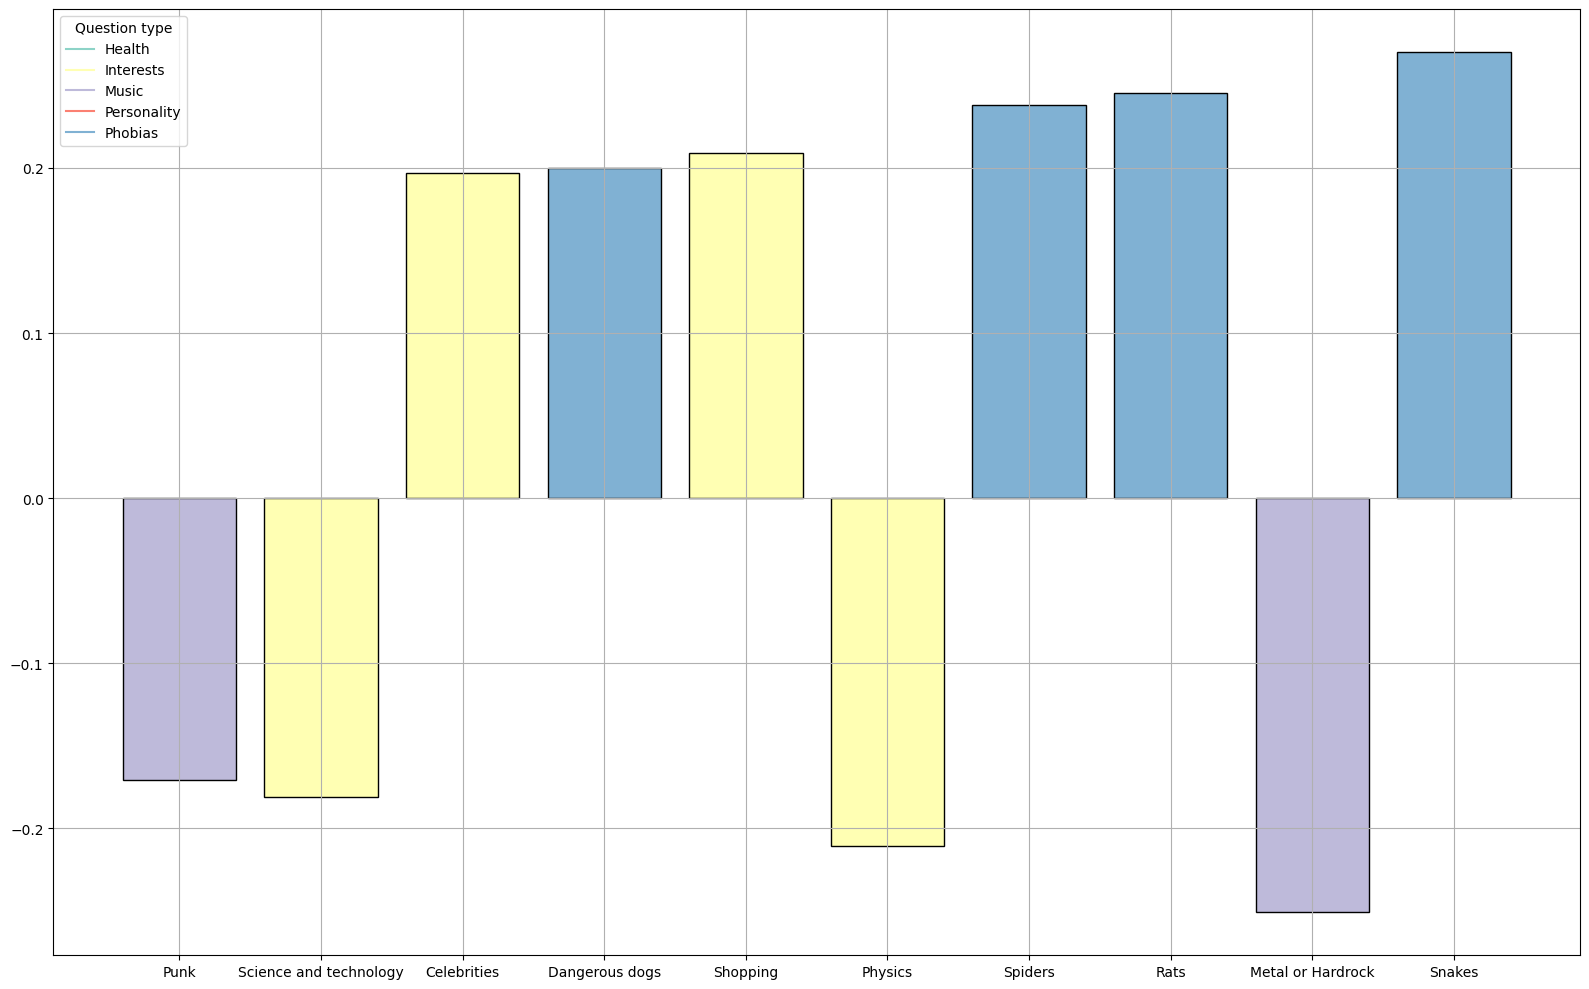

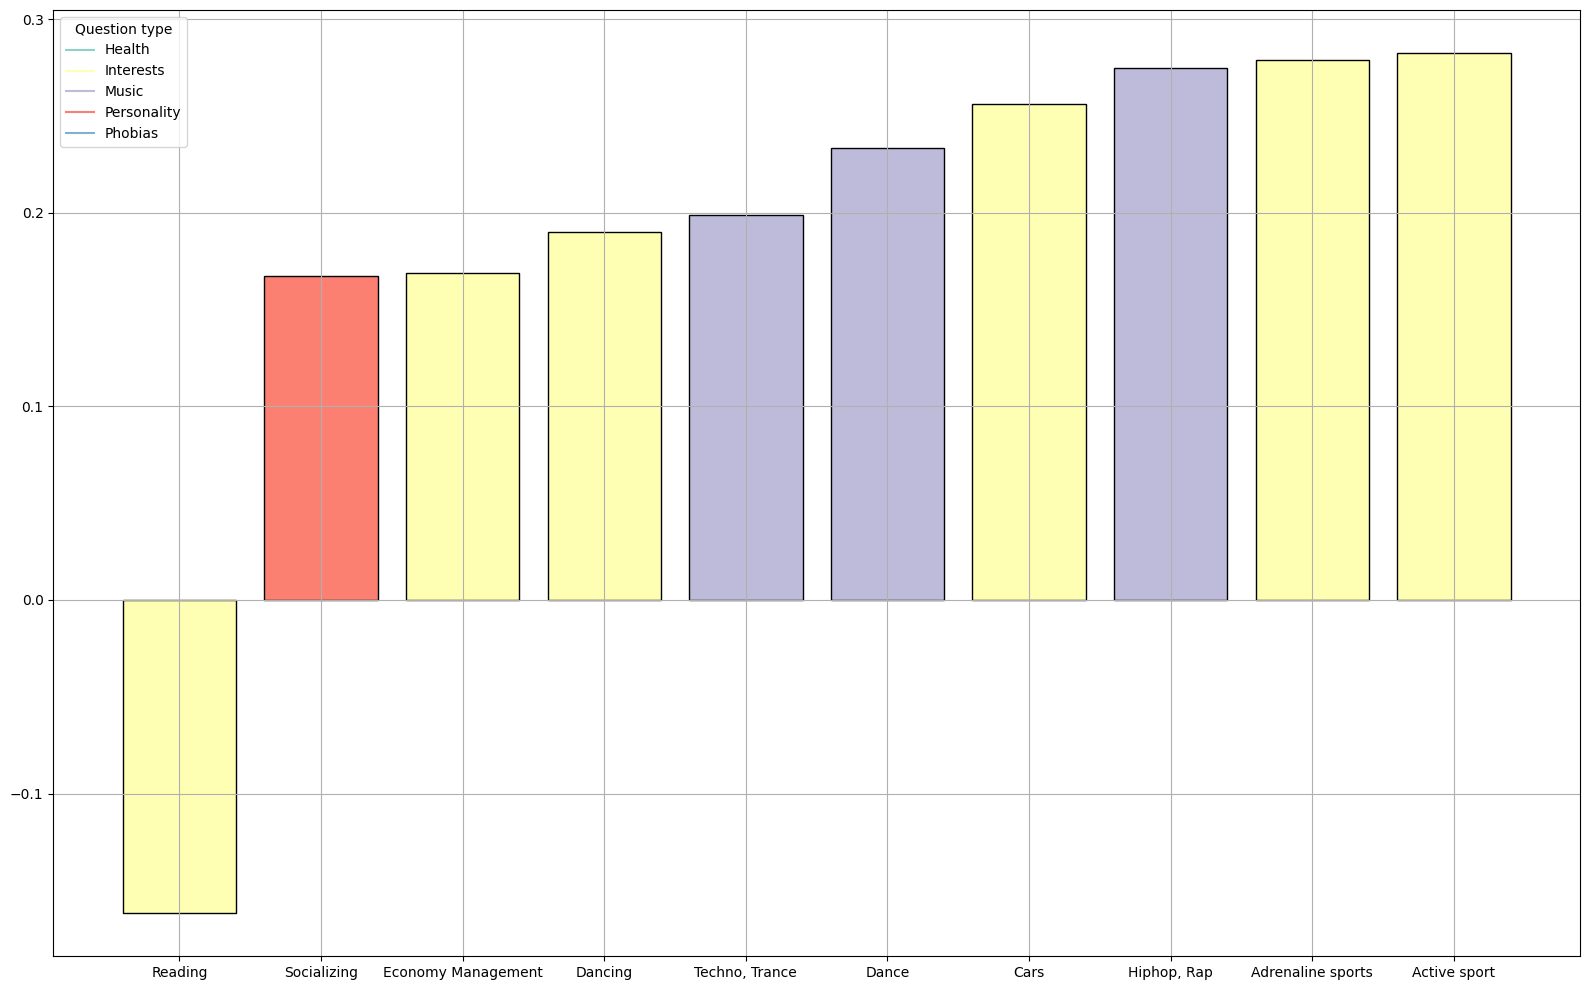

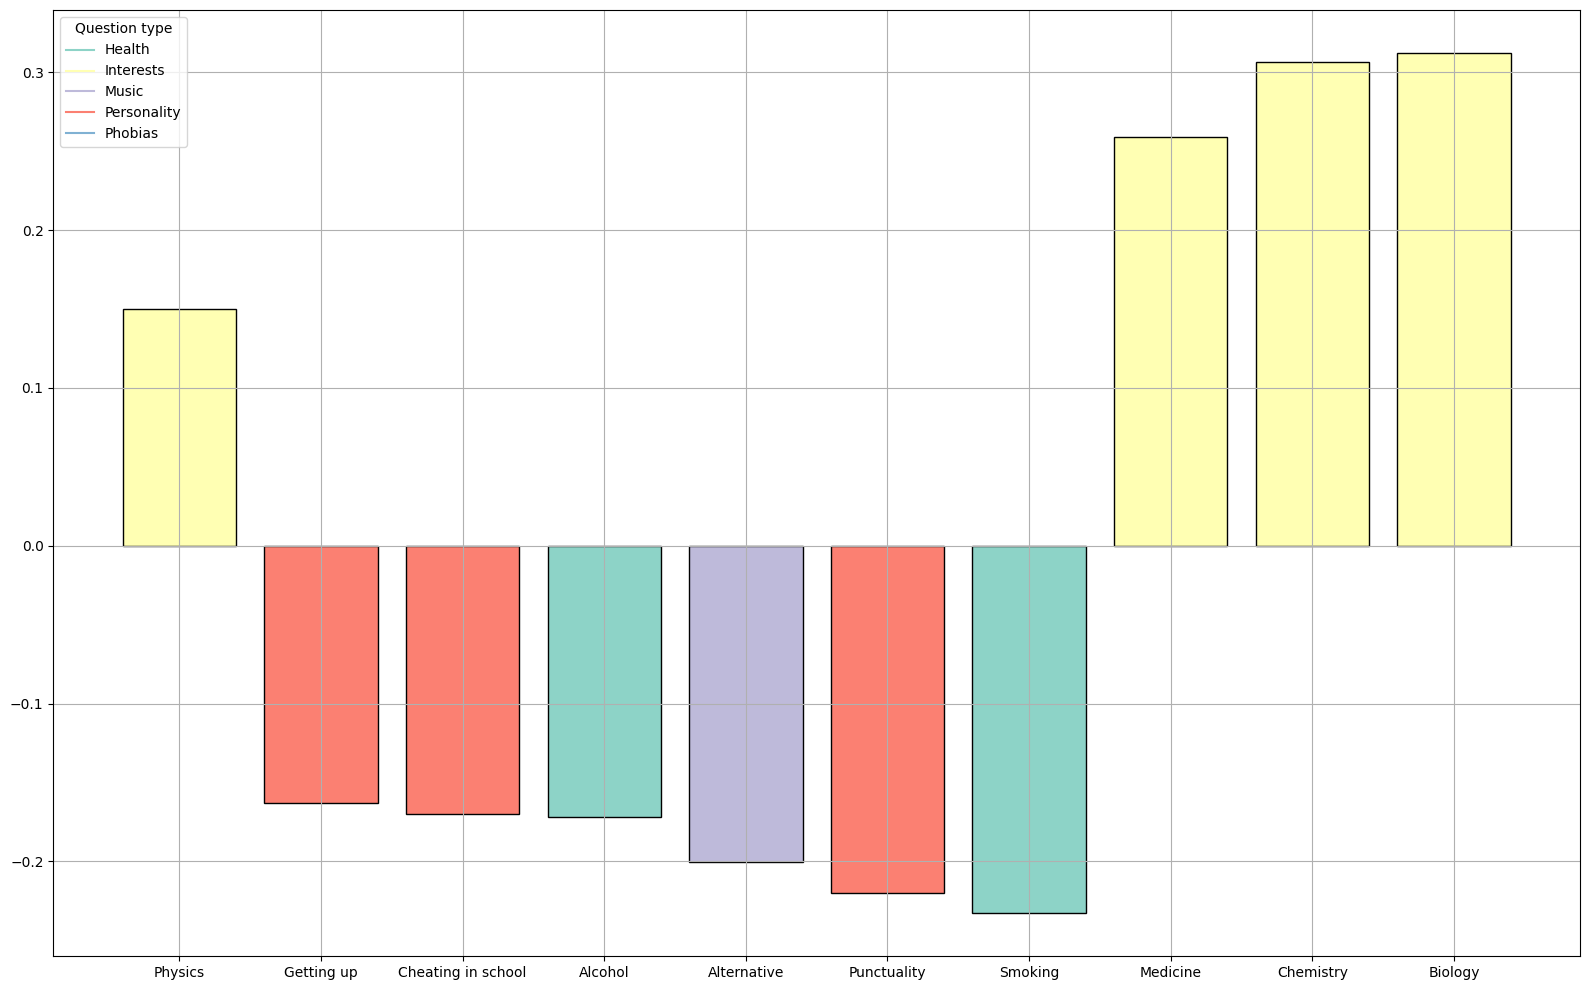

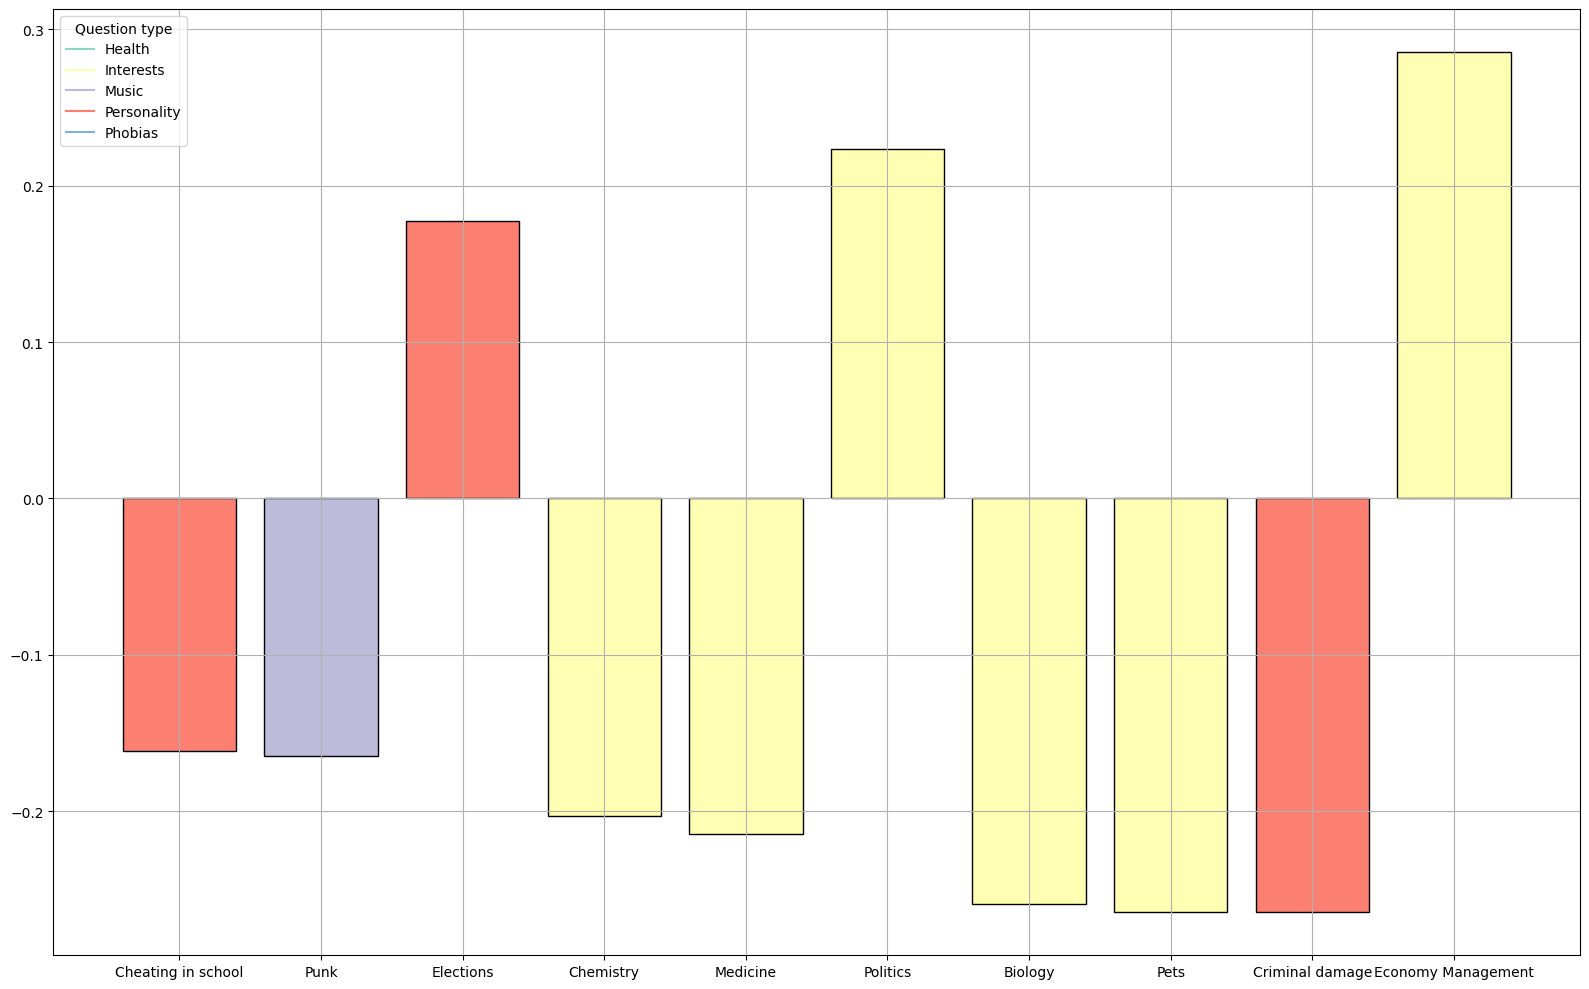

In [132]:
n_components_mm = pca_minmax_m.n_components_

loadings_mm = [] #loadings
indexes_mm = [] #list to store the indexes of the top 10 loadings
top_10_loadings_mm = [] #top 10 loadings
top_10_features_mm = [] #names of the corresponding top 10 features

for ii in range(n_components_mm):

    loadings = pca_minmax_m.components_[ii,:]
    indexes = np.argsort(np.abs(loadings))[-10:]
    top_10_loadings = loadings[indexes]
    top_10_features = X_df.columns[indexes]
    top_10_colors = [variable_to_color[var] for var in top_10_features]

    plt.figure(figsize=(16,10))
    plt.bar(range(10), top_10_loadings, color = top_10_colors, edgecolor = "black")
    plt.xticks(range(10), labels= top_10_features)
    plt.legend(handles = type_colors_legend, title = "Question type")
    plt.grid()
    plt.tight_layout()
    plt.show()

    loadings_mm.append(loadings)
    indexes_mm.append(indexes)
    top_10_loadings_mm.append(top_10_loadings)
    top_10_features_mm.append(top_10_features)



We discuss the results of the new analysis.

In [133]:
#We can give then each PC a name

pc_mm_names = ["Classical arts", "Phobias vs science and metal", "Sports and alternative music", "Science vs bad habits", "Politics vs science" ]

Comparison between the results of the two analyses!

## Section 3.x: Score Graphs

To plot the score graph, we first have to project the data in the new reference system

In [135]:
Y_std = pca_std_m.transform(Xstd_df)

Y_mm = pca_minmax_m.transform(Xmm_df)

print(Y_std.shape)

(495, 5)


We can now plot the score graph for the standardized dataset

In [144]:
print(variables_by_type["Demographics"])

['Age', 'Height', 'Weight', 'Number of siblings', 'Gender', 'Hand', 'Education', 'Only child', 'Home Town Type', 'Home Type']


In [160]:
#We first define a color set for each label we are interested in.
#We choose to study the labels related to age, gender, education, home town type
set1 = cm.Set1.colors
set2 = cm.Set2.colors


edu = resp_filt['Education'].unique()
print(f"Education levels are: {list(edu)}")

home_town = resp_filt['Home Town Type'].unique()
print(f"Different home town types: {list(home_town)}")

age = resp_filt["Age"].unique()
print(f"Different age levels: {age}")

gender = resp_filt["Gender"].unique()
print(f"Genders represented: {list(gender)}")



Education levels are: ['college/bachelor degree', 'secondary school', 'primary school', 'masters degree', 'doctorate degree', 'currently a primary school pupil']
Different home town types: ['village', 'city', nan]
Different age levels: [20. 19. 22. 17. 24. 18. 25. 23. 26. 21. 28. 16. 15. nan 29. 30. 27.]
Genders represented: ['female', 'male', nan]


In [161]:
color_education = {
    'secondary school' : set1[0],
    'college/bachelor degree' : set1[1],
    'primary school' : set1[2],
    'masters degree' : set1[3],
    'doctorate degree' : set1[4],
    'currently a primary school pupil': set1[5],
    'missing': 'grey'
}

color_town_type = {
    'city' : set2[0],
    'village': set2[1],
    'missing': 'grey'
}

color_gender = {
    'female': set2[2],
    'male': set2[3],
    'missing': 'grey'
}

def assign_color_age(value):
    if value < 20:
        return 'red'
    elif 20 <= value < 25:
        return 'yellow'
    elif value >= 25:
        return 'blue'
    else:
        return 'grey' #this is for missing values






In [164]:
#now we create the corresponding columns
#we manage missing values with the grey color

colors_edu = resp_filt["Education"].apply(lambda x: color_education[x] if pd.notnull(x) else color_education['missing'])
colors_town = resp_filt["Home Town Type"].apply(lambda x: color_town_type[x] if pd.notnull(x) else color_town_type['missing'])
colors_gen = resp_filt["Gender"].apply(lambda x: color_gender[x] if pd.notnull(x) else color_gender['missing'])
colors_age = resp_filt["Age"].apply(assign_color_age)



In [167]:
display(colors_gen)

0       (0.5529411764705883, 0.6274509803921569, 0.796...
1       (0.5529411764705883, 0.6274509803921569, 0.796...
2       (0.5529411764705883, 0.6274509803921569, 0.796...
3       (0.5529411764705883, 0.6274509803921569, 0.796...
4       (0.5529411764705883, 0.6274509803921569, 0.796...
                              ...                        
1004    (0.9058823529411765, 0.5411764705882353, 0.764...
1005    (0.5529411764705883, 0.6274509803921569, 0.796...
1007    (0.5529411764705883, 0.6274509803921569, 0.796...
1008    (0.5529411764705883, 0.6274509803921569, 0.796...
1009    (0.9058823529411765, 0.5411764705882353, 0.764...
Name: Gender, Length: 495, dtype: object

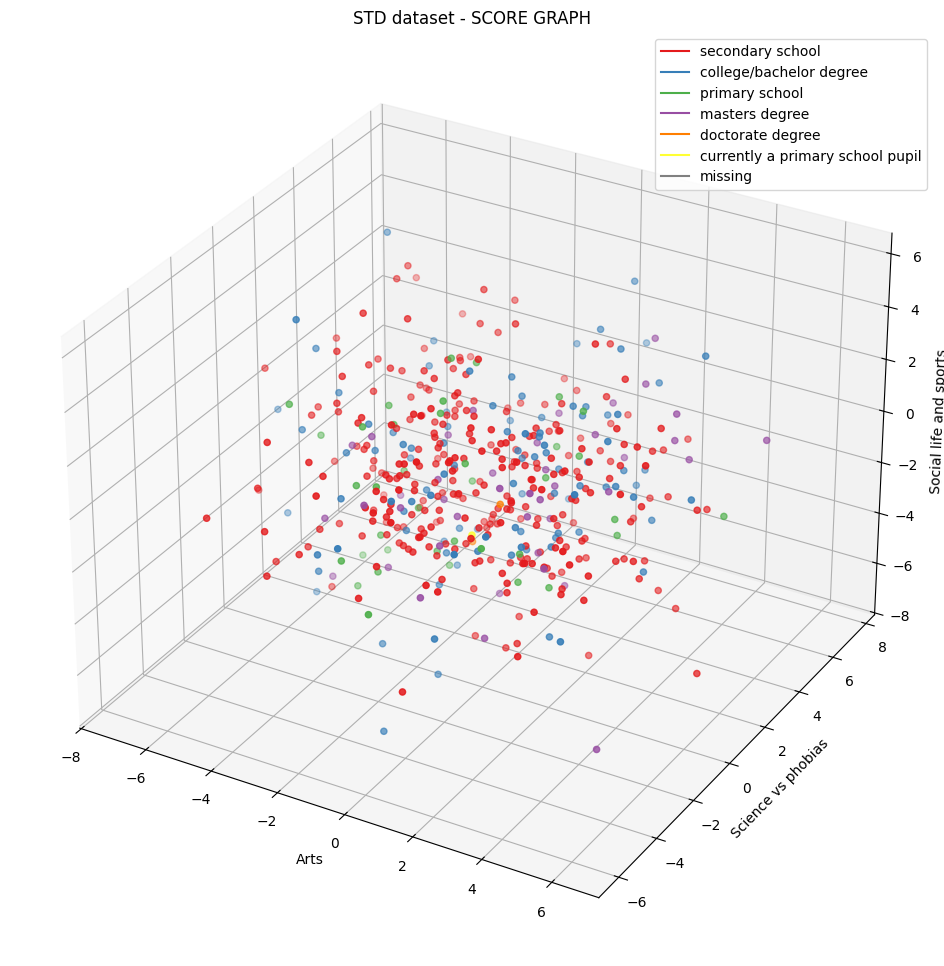

In [165]:
#let's consider education first
colors_edu_legend = [Line2D([0], [0], color=color_education[k], label = k) for k in color_education.keys()]

sg_std = plt.figure(figsize=(12, 12))
ax_sg_std = sg_std.add_subplot(111, projection='3d')
ax_sg_std.scatter(Y_std[:,0],Y_std[:,1],Y_std[:,2], color= colors_edu)
plt.title('STD dataset - SCORE GRAPH')
ax_sg_std.set_xlabel(pc_std_names[0])
ax_sg_std.set_ylabel(pc_std_names[1])
ax_sg_std.set_zlabel(pc_std_names[2])
plt.legend(colors_edu_legend, [k for k in color_education.keys()])
plt.grid()
plt.show()

Since the PCA with 5 components does not even reach 33% of the variance in the data, it is reasonable that we don't see a clear trend or specific areas in the score graph.

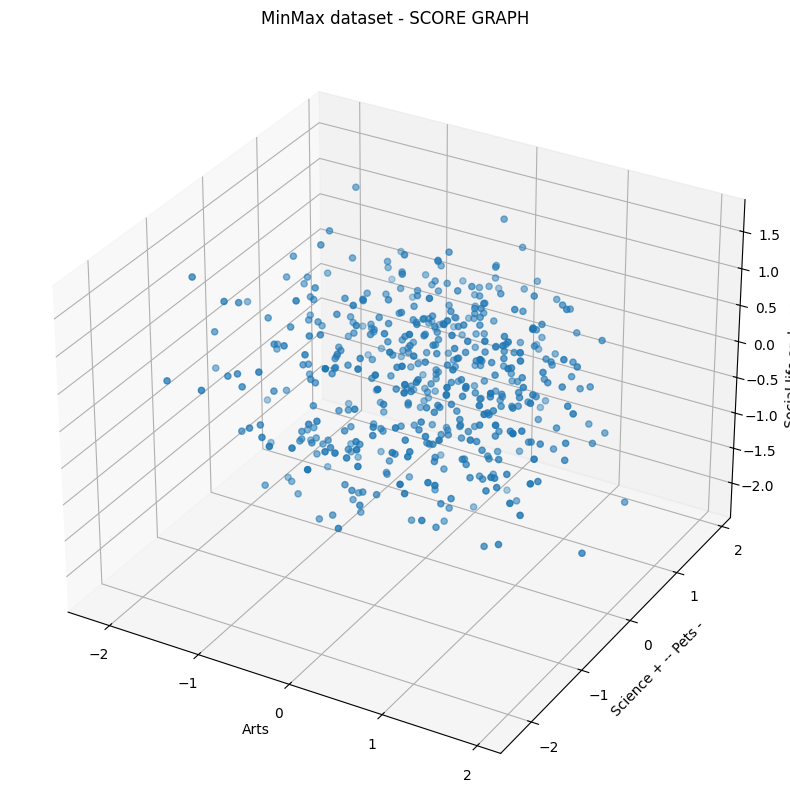

In [47]:
sg_mm = plt.figure(figsize=(10, 10))
ax_sg_mm = sg_mm.add_subplot(111, projection='3d')
ax_sg_mm.scatter(Y_mm[:,0],Y_mm[:,1],Y_mm[:,2])
plt.title('MinMax dataset - SCORE GRAPH')
ax_sg_mm.set_xlabel(pc_std_names[0])
ax_sg_mm.set_ylabel(pc_std_names[1])
ax_sg_mm.set_zlabel(pc_std_names[2])
#plt.legend(overall_colors_legend, [k for k in dict_overall_colors.keys()])
plt.grid()
plt.show()

## Exercise 4. $k$-Means

In the cells below, do the following operations:
1. For each one of the two datasets (_std_ and _mm_), run the $k$-Means for clustering the data. In particular, **use the silohuette score for identify the best value for $k\in\{3, \ldots, 10\}$**.
2. Plot the score graphs of exercise 3.3, adding the centroids of the cluster.
3. Observing the centroids coordinates in the PC space, **give a name/interpretation to them**, exploiting the names you assigned to the PCs. **Comment and motivate your interpretations**.

## Exercise 5. Cluster Evaluations

In the cells below, do the following operations:
1. For each one of the two datasets (_std_ and _mm_), perform an **external evaluation** of the clustering obtained at exercise 4.1 with respect to one or more labels in the list _labels_. **Comment the results, comparing the evaluation with the interpretation you gave at exercise 4.3**. 
2. For each one of the two datasets (_std_ and _mm_), perform an **internal evaluation** of each cluster, with respect to the silohuette score. **Comment the results**. 